In [1]:
import pandas as pd

df = pd.read_csv('fish_all.csv')

In [2]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.loc[df['Species']=='Perch','Species'] = 0
df.loc[df['Species']=='Bream','Species'] = 1
df.loc[df['Species']=='Roach','Species'] = 2
df.loc[df['Species']=='Pike','Species'] = 3
df.loc[df['Species']=='Smelt','Species'] = 4
df.loc[df['Species']=='Parkki','Species'] = 5
df.loc[df['Species']=='Whitefish','Species'] = 6
df['Species'] = df['Species'].astype(int)

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x_axis = []
y_inertia = []
y_silhouette_score = []
for k in range(2, 31):
    x_axis.append(k)
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(df)
    silhouette = silhouette_score(df, kmeans.labels_)
    print(k, kmeans.inertia_, silhouette)
    y_inertia.append(kmeans.inertia_)
    y_silhouette_score.append(silhouette)

2 5531740.955674436 0.6669539161022533
3 2779969.248515119 0.6403869478655825
4 1666297.5467121832 0.6555801866577657
5 914114.2050970374 0.6021709102385675
6 603367.2351651527 0.5969584314015867
7 406731.3229314599 0.6054791993305302
8 296259.6789915597 0.6016808649402562
9 227821.2258662401 0.6110665303454312
10 189879.45836141886 0.5916073842491487
11 149825.7554003305 0.5750865619114344
12 125284.78923916793 0.5793311693225353
13 108650.94413374175 0.5636027371667526
14 92432.49236697152 0.5672792103417463
15 73592.33826943491 0.5854945672119543
16 64258.1078504801 0.5757586927055321
17 54220.356129263106 0.5867366681430692
18 49408.03357879186 0.5827176922172678
19 43797.604175018554 0.5860200210477505
20 36362.120835844704 0.5896542039080009
21 34436.907116050184 0.5923987904647291
22 30862.602100519147 0.5610396777623939
23 28270.082631239107 0.5900910700961641
24 25663.9138506114 0.5685704372417237
25 23065.018424064372 0.5794253066802375
26 20575.253626160662 0.554793189532636

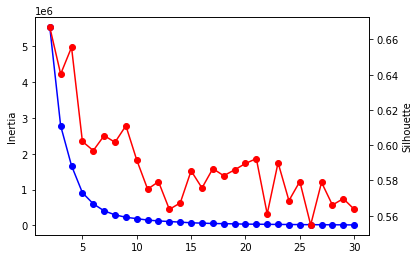

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(x_axis, y_inertia, marker='o', color='blue')
ax1.set_ylabel('Inertia')
ax2 = ax1.twinx()
ax2.plot(x_axis, y_silhouette_score, marker='o', color='red')
ax2.set_ylabel('Silhouette')
plt.show()

In [6]:
add_combine = []
keys = df.keys().values

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(df)

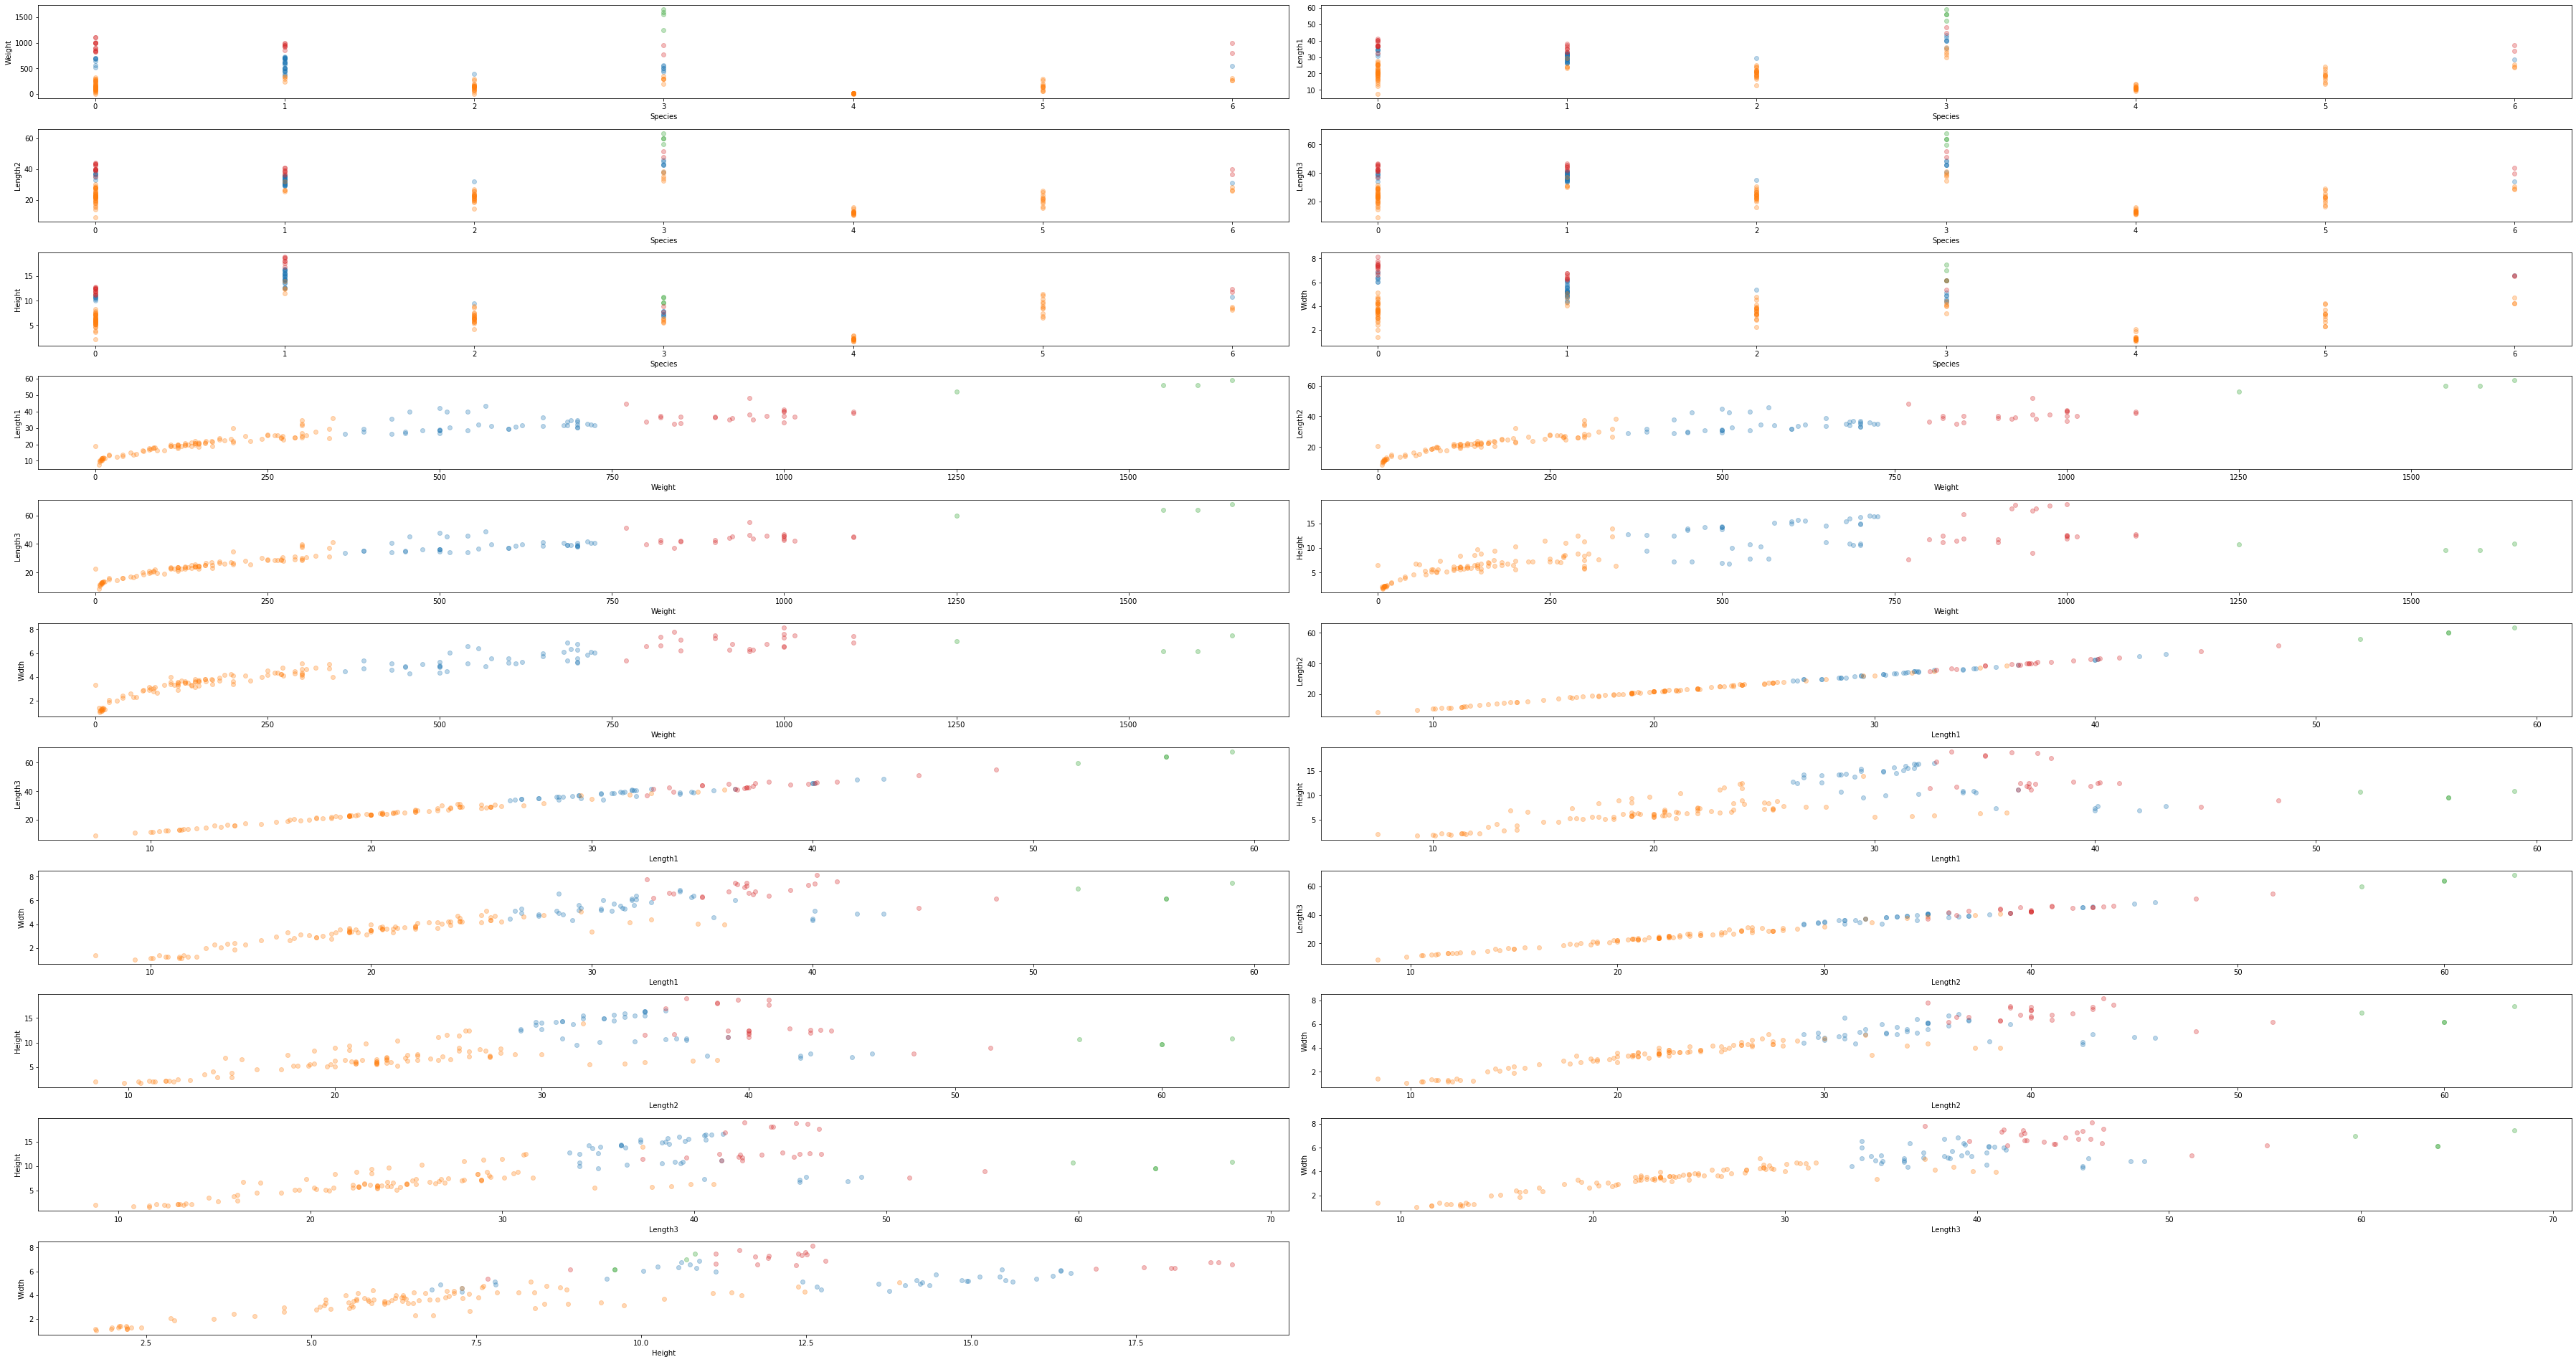

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

total = len(keys)*(len(keys)-1)
col = 2
row = int(total/2+0.5)
idx = 1

fig = plt.figure(figsize=(50,50))
for x_value_key in keys:
    for y_value_key in keys:
        if x_value_key == y_value_key:
            continue
        elif (x_value_key,y_value_key) in add_combine or (y_value_key,x_value_key) in add_combine:
            continue
        
        ax = fig.add_subplot(row,col,idx)
        for k in range(4):
            ax.scatter(df[x_value_key][y_pred==k], df[y_value_key][y_pred==k], alpha=0.3)
        ax.set_xlabel(x_value_key)
        ax.set_ylabel(y_value_key)
        add_combine.append((x_value_key,y_value_key))
        add_combine.append((y_value_key,x_value_key))
        idx += 1
plt.tight_layout()
plt.show()

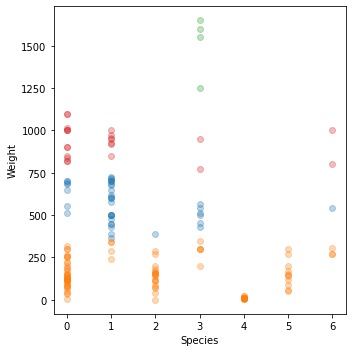

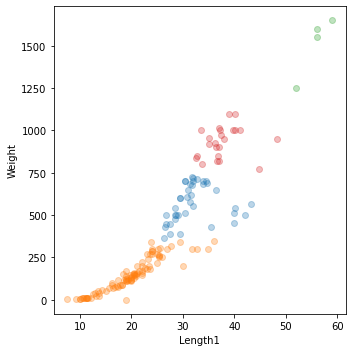

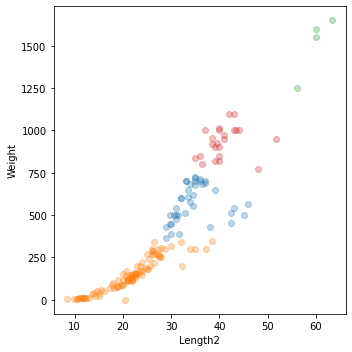

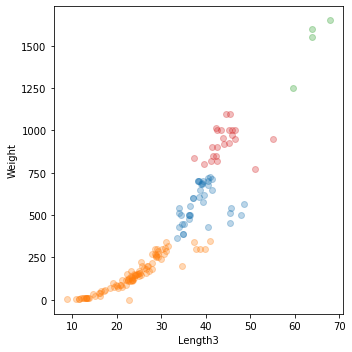

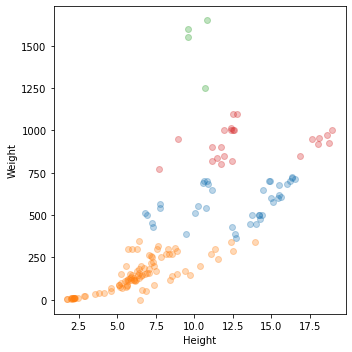

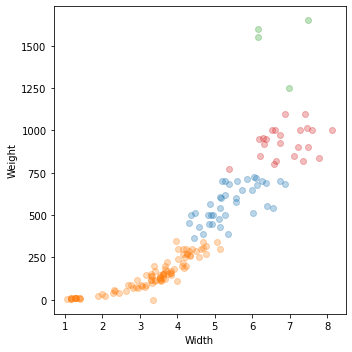

In [9]:
%matplotlib inline

keys = df.keys().drop('Weight').values
import matplotlib.pyplot as plt
for x_value_key in keys:
    y_value_key = 'Weight'
    plt.figure(figsize=(5,5))
    for k in range(4):
        plt.scatter(df[x_value_key][y_pred==k], df[y_value_key][y_pred==k], alpha=0.3)
    plt.xlabel(x_value_key)
    plt.ylabel(y_value_key)
    plt.tight_layout()
    plt.show()

In [10]:
import numpy as np
feature = df[df.keys().drop('Species')]
target = kmeans.fit_predict(feature)

In [11]:
feature

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

train_feature, test_feature, train_target, test_target = train_test_split(feature,target,random_state=42, stratify=target)

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(train_feature,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
y_pred = clf.predict(test_feature)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target, y_pred,labels=[3,2,1,0]))

Accuracy : 1.0
[[ 6  0  0  0]
 [ 0  1  0  0]
 [ 0  0 23  0]
 [ 0  0  0 10]]
